In [2]:

#loading
%matplotlib inline
import fnmatch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import json
from scipy.io import loadmat
import os

## Emittance Scan

In [12]:
emit_mat = loadmat('Emittance-scan-OTRS_IN20_571-2020-06-21-145152.mat')

In [13]:
emit_mat['data'][0].dtype.names

('status',
 'type',
 'name',
 'quadName',
 'quadVal',
 'use',
 'ts',
 'beam',
 'beamStd',
 'beamList',
 'chargeList',
 'charge',
 'chargeStd',
 'rMatrix',
 'twiss0',
 'energy',
 'twiss',
 'twissstd',
 'orbit',
 'orbitstd',
 'twissPV')

## twissPV

In [9]:
#values for first twiss
emit_mat['data'][0]['twissPV'][0]['val'][0]

array([array([[0.41001786, 0.4195929 , 0.43815634, 0.77296327, 0.64820609,
        0.52070086, 0.75857319]])], dtype=object)

In [5]:
#name for first twiss
emit_mat['data'][0]['twissPV'][0]['name'][0]

array([array(['OTRS:IN20:571:EMITX'], dtype='<U19')], dtype=object)

In [6]:
#values for first twiss
emit_mat['data'][0]['twissPV'][0]['val'][1]

array([array([[1.12939612, 1.16440669, 1.16779273, 1.15295278, 1.08680721,
        1.18772123, 1.16988469]])], dtype=object)

In [7]:
#name for first twiss
emit_mat['data'][0]['twissPV'][0]['name'][1]

array([array(['OTRS:IN20:571:BETAX'], dtype='<U19')], dtype=object)

## beam data

In [8]:
# beam data is sample per row, method of fit per column

In [9]:
emit_mat['data'][0]['beam'][0].shape

(5, 7)

In [10]:
emit_mat['data'][0]['beam'][0];#SAMPLE, METHOD

In [43]:
emit_mat['data'][0]['beam'][0][0,0]['stats'][0,2] #xrms
#emit_mat['data'][0]['beam'][0][step,method]['stats'][0,2] #xrms

142.25218496245148

In [18]:
emit_mat['data'][0]['beam'][0][0,0]['stats'][0,3] #yrms


102.31591485349523

In [ ]:
emit_mat['data'][0]['beam'][0][0,0]['statsStd'][0,2] #xrms std


In [21]:
emit_mat['data'][0]['beam'][0][0,0]['statsStd'][0,3] #yrms std

2.7950137017462877

## Profiles anad fits

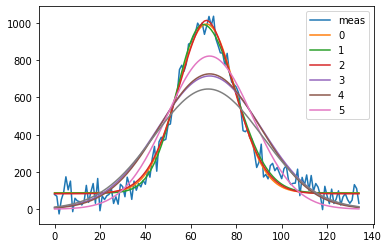

In [12]:
## X Profiles
plt.plot(emit_mat['data'][0]['beam'][0][0,0]['profx'][1])
plt.plot(emit_mat['data'][0]['beam'][0][0,0]['profx'][2])
plt.plot(emit_mat['data'][0]['beam'][0][0,1]['profx'][2])
plt.plot(emit_mat['data'][0]['beam'][0][0,2]['profx'][2])
plt.plot(emit_mat['data'][0]['beam'][0][0,3]['profx'][2])
plt.plot(emit_mat['data'][0]['beam'][0][0,4]['profx'][2])
plt.plot(emit_mat['data'][0]['beam'][0][0,5]['profx'][2])
plt.plot(emit_mat['data'][0]['beam'][0][0,6]['profx'][2])
plt.legend(['meas','0','1','2','3','4','5'])

In [13]:
## Y Profiles
plt.plot(emit_mat['data'][0]['beam'][0][0,0]['profy'][1])
plt.plot(emit_mat['data'][0]['beam'][0][0,0]['profy'][2])
plt.plot(emit_mat['data'][0]['beam'][0][0,1]['profy'][2])
plt.plot(emit_mat['data'][0]['beam'][0][0,2]['profy'][2])
plt.plot(emit_mat['data'][0]['beam'][0][0,3]['profy'][2])
plt.plot(emit_mat['data'][0]['beam'][0][0,4]['profy'][2])
plt.plot(emit_mat['data'][0]['beam'][0][0,5]['profy'][2])
plt.plot(emit_mat['data'][0]['beam'][0][0,6]['profy'][2])
plt.legend(['meas','0','1','2','3','4','5'])

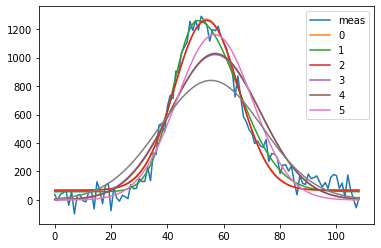

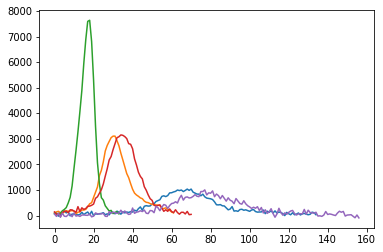

In [15]:
#look at a scan
for i in range(0,5):
    plt.plot(emit_mat['data'][0]['beam'][0][i,0]['profx'][1])

In [21]:
emit_mat['data'][0]['beam'][0].dtype.names

('profx',
 'xStat',
 'xStatStd',
 'profy',
 'yStat',
 'yStatStd',
 'profu',
 'uStat',
 'uStatStd',
 'method',
 'stats',
 'statsStd')

## quad values

In [25]:

emit_mat['data'][0]['quadVal'][0][0]

array([-6.  , -4.25, -2.5 , -0.75,  1.  ])

In [144]:
emit_mat['data']['quadName'][0][0][0]

'QUAD:IN20:525'

# Collect from one Emit Scan 

In [49]:
fname='Emittance-scan-OTRS_IN20_571-2020-06-21-145152.mat'
data=loadmat("./"+fname)

twissPV = data['data'][0]['twissPV'][0]
beam_dat = data['data'][0]['beam'][0]
num_methods = beam_dat.shape[1]
num_steps = beam_dat.shape[0]
num_samples = data['data']['chargeList'][0][0][0].shape[0]

emitx = np.empty((num_steps,num_methods)) #
emity = np.empty((num_steps,num_methods)) #
betax = np.empty((num_steps,num_methods)) #
betay = np.empty((num_steps,num_methods)) #
alphax = np.empty((num_steps,num_methods)) #
alphay = np.empty((num_steps,num_methods)) #
bmagx = np.empty((num_steps,num_methods)) #
bmagy = np.empty((num_steps,num_methods)) #

xrms = np.empty((num_steps,))
yrms = np.empty((num_steps,))

xrms_std = np.empty((num_steps,))
yrms_std = np.empty((num_steps,))

energy = np.empty((num_steps,))


tsMeas = np.empty((num_steps,)) #
tsPV = np.empty((num_steps,)) #
ctrlPV_name = np.empty((num_steps,),dtype=np.dtype('U100'))
ctrlPV_val = np.empty((num_steps,))
chg = np.empty((num_steps,num_samples))
profx = np.empty((num_steps,data['data'][0]['beam'][0][0,0]['profx'][1].shape[0]))
profy = np.empty((num_steps,data['data'][0]['beam'][0][0,0]['profy'][1].shape[0]))
chgstd = np.empty((num_steps,num_samples))
run = np.empty((num_steps,),dtype=np.dtype('U100'))

ctrlPV_val = np.empty((num_steps,)) #

ctrlPV_name[:] = data['data']['quadName'][0][0][0].astype(np.dtype('U100'))
run[:] =fname

ctrlPV_val[:] = data['data'][0]['quadVal'][0][0]

for j in range(0,num_steps):

    emitx[j,:] = twissPV['val'][0][0][0]

    emity[j,:] = twissPV['val'][4][0][0]

    betax[j,:] = twissPV['val'][1][0][0]

    betay[j,:] = twissPV['val'][5][0][0]

    alphax[j,:] = twissPV['val'][2][0][0]

    alphay[j,:] = twissPV['val'][6][0][0]

    bmagx[j,:] = twissPV['val'][3][0][0]

    bmagy[j,:] =twissPV['val'][7][0][0]

    tsMeas[j] = data['data']['ts']
    
    
    chg[j,:]=data['data']['chargeList'][0][0][j]
    chgstd[j]=data['data']['chargeStd']
    
    
    xrms[j] = data['data'][0]['beam'][0][j,0]['stats'][0,2]
    yrms[j] = data['data'][0]['beam'][0][j,0]['stats'][0,3]

    xrms_std[j] = data['data'][0]['beam'][0][j,0]['statsStd'][0,2]
    yrms_std[j] = data['data'][0]['beam'][0][j,0]['statsStd'][0,3]
    
    energy[j] = data['data']['energy']

df = pd.DataFrame({'run' : fname,
        'emitx' : emitx[:,0],
        'emity' : emity[:,0],
        'betax' : betax[:,0],
        'betay' : betay[:,0],
        'alphax' : alphax[:,0],
        'alphay' : alphay[:,0],
        'bmagx' : bmagx[:,0],
        'bmagy'  : bmagy[:,0],
        'chg'  : chg[:,0],
        'energy' : energy[:],
        'xrms' : xrms[:],
        'yrms' : yrms[:],
        'xrms_std' : xrms_std[:],
        'yrms_std' : yrms_std[:],
        'tsMeas'  : tsMeas,
        'ctrlPV_val': ctrlPV_val,
        'ctrlPV_name': ctrlPV_name})


In [50]:
df

,run,emitx,emity,betax,betay,alphax,alphay,bmagx,bmagy,chg,energy,xrms,yrms,xrms_std,yrms_std,tsMeas,ctrlPV_val,ctrlPV_name
0,Emittance-scan-OTRS_IN20_571-2020-06-21-145152...,0.441574,0.479837,2.041942,1.568655,-0.238407,0.098261,1.19493,1.073886,0.241145,0.135,142.252185,102.315915,3.361315,2.795014,737963.619363,-5.517900,QUAD:IN20:525
1,Emittance-scan-OTRS_IN20_571-2020-06-21-145152...,0.441574,0.479837,2.041942,1.568655,-0.238407,0.098261,1.19493,1.073886,0.242144,0.135,102.829644,57.603621,2.597567,1.270074,737963.619363,-4.519675,QUAD:IN20:525
2,Emittance-scan-OTRS_IN20_571-2020-06-21-145152...,0.441574,0.479837,2.041942,1.568655,-0.238407,0.098261,1.19493,1.073886,0.241029,0.135,79.477429,42.734515,2.122466,0.417468,737963.619363,-3.521450,QUAD:IN20:525
3,Emittance-scan-OTRS_IN20_571-2020-06-21-145152...,0.441574,0.479837,2.041942,1.568655,-0.238407,0.098261,1.19493,1.073886,0.239273,0.135,50.142066,69.352124,0.714112,0.544865,737963.619363,-2.523225,QUAD:IN20:525
4,Emittance-scan-OTRS_IN20_571-2020-06-21-145152...,0.441574,0.479837,2.041942,1.568655,-0.238407,0.098261,1.19493,1.073886,0.237072,0.135,55.691068,108.715472,0.686896,1.306614,737963.619363,-1.525000,QUAD:IN20:525


## CorrPlots

In [2]:
filenames=[]
for file in os.scandir("./"):
    if file.name.endswith(".mat"):
        if fnmatch.fnmatch(file, '*QUAD_IN20_121*'):#SOLN, QUAD_IN20_122, QUAD_IN20_121
            filenames.append(file.name)
print('Total ',len(filenames),'files:')

combined =[]
ts_all=[]
df_all=pd.DataFrame().astype(object)
noload=0

for i,fname in enumerate(filenames):
    print(fname)
    data=loadmat("./"+fname)
    combined += data
    
    try:
        twissPV = data['data'][0][0]['twissPV']
        num_methods = twissPV[0,1][1].shape[1]
        num_steps = twissPV[0,:].shape[0]

        emitx = np.empty((num_steps,num_methods)) #
        emity = np.empty((num_steps,num_methods)) #
        betax = np.empty((num_steps,num_methods)) #
        betay = np.empty((num_steps,num_methods)) #
        alphax = np.empty((num_steps,num_methods)) #
        alphay = np.empty((num_steps,num_methods)) #
        bmagx = np.empty((num_steps,num_methods)) #
        bmagy = np.empty((num_steps,num_methods)) #
        tsMeas = np.empty((num_steps,)) #
        tsPV = np.empty((num_steps,)) #
        ctrlPV_name = np.empty((num_steps,),dtype=np.dtype('U100'))
        ctrlPV_val = np.empty((num_steps,))
        chg = np.empty((num_steps,))
        run = np.empty((num_steps,),dtype=np.dtype('U100'))
        
        ctrlPV_val = np.empty((num_steps,)) #

        ctrlPV_name[:] = data['data'][0][0][2][0][0][0][0].astype(np.dtype('U100'))
        run[:] =filenames[0]


        for j in range(0,num_steps):

            emitx[j,:] = twissPV[0,j][1][0]

            emity[j,:] = twissPV[4,j][1][0]

            betax[j,:] = twissPV[1,j][1][0]

            betay[j,:] = twissPV[5,j][1][0]

            alphax[j,:] = twissPV[2,j][1][0]

            alphay[j,:] = twissPV[6,j][1][0]

            bmagx[j,:] = twissPV[3,j][1][0]

            bmagy[j,:] = twissPV[7,j][1][0]

            tsMeas[j] = twissPV[0,j][2]

            ctrlPV_val[j] =data['data'][0][0][2][0][j][1][0][0]

            tsPV[j] = data['data'][0][0][2][0][j][2][0][0]

            chg[j]=data['data'][0][0]['readPV'][0][j][1][0][0]
            
        df = pd.DataFrame({'run' : filenames[i],
                'emitx' : emitx[:,5],
                'emity' : emity[:,5],
                'betax' : betax[:,5],
                'betay' : betay[:,5],
                'alphax' : alphax[:,5],
                'alphay' : alphay[:,5],
                'bmagx' : bmagx[:,5],
                'bmagy'  : bmagy[:,5],
                'tsMeas'  : tsMeas,
                'tsPV': tsPV,
                'ctrlPV_val': ctrlPV_val,
                          'ctrlPV_name': ctrlPV_name})
        df_all = df_all.append(df,ignore_index=True)
        
    except:
        print('failed')
#df_all.to_pickle('corrplots_'+ctrlPV_name[0]+'.pkl')
#df_all.to_hdf('corrplots_'+ctrlPV_name[0]+'.h5',key='df', mode='w')

Total  5 files:
CorrelationPlot-QUAD_IN20_121_BCTRL-2021-02-18-130835.mat
CorrelationPlot-QUAD_IN20_121_BCTRL-2021-02-18-222002.mat
failed
CorrelationPlot-QUAD_IN20_121_BCTRL-2021-02-18-221852.mat
failed
CorrelationPlot-QUAD_IN20_121_BCTRL-2020-06-21-104451.mat
failed
CorrelationPlot-QUAD_IN20_121_BCTRL-2020-06-21-110754.mat


In [3]:
import pandas as pd

da = pd.read_pickle('corrplots_SOLN:IN20:121:BCTRL.pkl')

In [5]:
da

,run,emitx,emity,betax,betay,alphax,alphay,bmagx,bmagy,tsMeas,tsPV,ctrlPV_val,ctrlPV_name
0,CorrelationPlot-SOLN_IN20_121_BCTRL-2020-06-21...,1.375583,0.897078,2.951984,4.856548,1.398008,-1.423036,1.987530,2.445618,737963.640039,737963.639471,0.450000,SOLN:IN20:121:BCTRL
1,CorrelationPlot-SOLN_IN20_121_BCTRL-2020-06-21...,1.265147,0.361766,2.412041,9.443199,1.415332,-3.481986,1.879950,4.805325,737963.640665,737963.639471,0.450000,SOLN:IN20:121:BCTRL
2,CorrelationPlot-SOLN_IN20_121_BCTRL-2020-06-21...,1.272949,0.838851,1.843917,3.924477,1.310587,-1.852989,1.742631,2.275586,737963.641281,737963.639471,0.450000,SOLN:IN20:121:BCTRL
3,CorrelationPlot-SOLN_IN20_121_BCTRL-2020-06-21...,0.904246,0.716763,2.424907,3.195072,0.671753,-0.601458,1.475737,1.641081,737963.641968,737963.641397,0.456667,SOLN:IN20:121:BCTRL
4,CorrelationPlot-SOLN_IN20_121_BCTRL-2020-06-21...,0.831620,0.577530,2.070467,2.748163,0.679291,-0.819658,1.375457,1.524935,737963.642613,737963.641397,0.456667,SOLN:IN20:121:BCTRL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,CorrelationPlot-SOLN_IN20_121_BCTRL-2020-06-21...,0.505607,0.441956,1.659775,1.828982,0.221116,-0.412891,1.117078,1.154496,737963.457433,737963.456842,0.460000,SOLN:IN20:121:BCTRL
76,CorrelationPlot-SOLN_IN20_121_BCTRL-2020-06-21...,0.435333,0.570538,1.262998,1.939592,-0.895285,1.021651,1.301713,1.532861,737963.458120,737963.457530,0.465000,SOLN:IN20:121:BCTRL
77,CorrelationPlot-SOLN_IN20_121_BCTRL-2020-06-21...,0.764626,0.000000,2.525417,0.000000,-3.479114,0.000000,3.783740,inf,737963.458815,737963.458211,0.470000,SOLN:IN20:121:BCTRL
78,CorrelationPlot-SOLN_IN20_121_BCTRL-2020-06-21...,1.505489,0.000000,3.938105,0.000000,-5.417579,0.000000,5.687275,inf,737963.459491,737963.458914,0.475000,SOLN:IN20:121:BCTRL
